### Twitter Sentiment Analysis

In this project I have done analysis on Twitter Sentiment  Data. The data is taken from http://cs.stanford.edu

<img src='img.png' width=80% />

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
columns = ['sentiment','id', 'date', 'query', 'user','text']

df = pd.read_csv('training.1600000.processed.noemoticon.csv',names = columns,encoding = "ISO-8859-1")

In [29]:
df.head(10)

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [30]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

###### There are 1.6 million of tweets.

.8 Million Negetive reviews (with label 0)
.8 Million Positive reviews (with label 4)

So the data is perfectly balanced. 

For this project I need just the text column and the sentiment columns for my analysis

In [44]:
df = df[['sentiment', 'text']]

In [45]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

Great there are no NULL columns in my data

In [46]:
##Lets look at the length of the twitter text

df['pre_length'] = [len(comments) for comments in df['text']]

In [47]:
print('Maximum Length',df['pre_length'].max())
print('Minimum Length',df['pre_length'].min())

print('Mean Length   ', df['pre_length'].mean())
print('Mode Length   ',df['pre_length'].mode())

Maximum Length 374
Minimum Length 6
Mean Length    74.09011125
Mode Length    0    138
dtype: int64


In [48]:
df['pre_length'].describe(percentiles = [0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
5%       2.200000e+01
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
95%      1.360000e+02
98%      1.380000e+02
99%      1.410000e+02
max      3.740000e+02
Name: pre_length, dtype: float64

In [49]:
df[df['pre_length'] > 141].count()

sentiment     13580
text          13580
pre_length    13580
dtype: int64

98%-99% of twitter text is of length <= 138-141

1% of the twitter text data is long

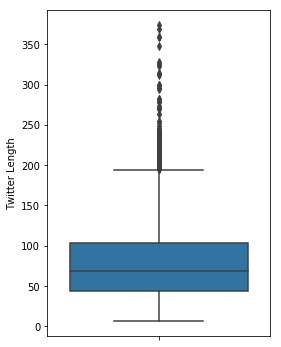

In [50]:
fig, ax = plt.subplots(figsize = (4,6))
sns.boxplot(y=df['pre_length'])
plt.ylabel('Twitter Length')
plt.show()

In [51]:
## Lets see some of the long twitter comments 

In [52]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 0)].head(15)

,sentiment,text,pre_length
213,0,Awwh babs... you look so sad underneith that s...,142
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
1071,0,Used the term &quot;Fail Whale&quot; to a clie...,148
1380,0,"@Craftysince1990 Lol, that's sweet! I bought t...",144
1704,0,@ktml I think its iTunes fault I cant download...,145
1745,0,I am layin in bed @ 3am cos my tummy is beatbo...,147


In [53]:
df[(df['pre_length'] > 141) & (df['sentiment'] == 4)].head(15)

,sentiment,text,pre_length
800014,4,@LutheranLucciol Make sure you DM me if you po...,144
800103,4,Just seen the preview for the movie &quot;Obse...,145
800174,4,@ninasplayground I agree. My kids got &quot;W...,148
800228,4,&quot;City of Ember&quot; was AWESOME!!! SO ha...,148
800252,4,Please?: http://eluts.com/frontstore/Item/ite...,150
800255,4,"@markhoppus hey mark, i want to know if the so...",147
800261,4,Awwh babs... you look so sad underneith that s...,142
800315,4,Giant Drag &quot;Wicked Game&quot; ? http://tw...,152
800333,4,@JonathanRKnight Glad to hear that you had suc...,142
800377,4,@robgokeemusic I know - I should have made som...,142


In [54]:
df.iloc[145]['text']

"@twista202 I still haven't read the 9th&amp;10th Princess diaries  Saving Francesca made me cry at the end. Hmm those are easy books."

In [55]:
## We see the HTMLtags are not converted correctely. We see &amp in the text.

## Lets use BeautifulSoup for to resolve this

In [56]:
from bs4 import BeautifulSoup

comments= [BeautifulSoup(comment,'lxml').get_text() for comment in df['text']]


KeyboardInterrupt: 

In [ ]:


import re

text = re.sub(r'@[A-za-z0-9]+',' ', str(df['text1']))

In [ ]:
df['text']= text

In [ ]:


text= re.sub(r'https?://[a-zA-Z0-9./]+', ' ', str(df['text']))

df['text']= text

In [ ]:
#!pip3 install nltk

In [ ]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

In [62]:
import re
import contractions


def clean_tweets(text):
    ## remove the @ mentions in the tweets 
    pattern1 = r'@[A-za-z0-9_]+'
    ## remove http links from the twitter comments
    pattern2 = r'https?://[a-zA-Z0-9./]+'
    ##remove the www pattern without httpprefix
    pattern3 = r'www.[^ ]+'
    ## remove all other than letters
    pattern4 = r'[^a-zA-Z]'
    ## extra spaces
    pattern5 =r' +'
    
    clean_text = BeautifulSoup(text,'lxml')
    clean_text = clean_text.get_text()
    
    try:
        clean_text = clean_text.decode("utf-8-sig").replace(u'\ufffd','?')
    except:
        clean_text = clean_text
    ##expand the contractions
    clean_text = contractions.fix(clean_text)  ## for example He's flying becomes he is flying
    ## remove the @ mentions in the tweets 
    clean_text = re.sub(pattern1, ' ', clean_text)
    ## remove http links from the twitter comments
    clean_text = re.sub(pattern2, ' ', clean_text)
    ## remove www links from the twitter comments
    clean_text = re.sub(pattern3, ' ', clean_text)
    ## remove all other than letters
    clean_text = re.sub(pattern4, ' ', clean_text)
    ##convert to lower case
    clean_text = clean_text.lower()
    ##remove extra lines and tabs
    clean_text = clean_text.translate(clean_text.maketrans('\n\t\r', '   '))
    ## remove extra spaces
    clean_text = re.sub(pattern5,' ', clean_text)

    
    return clean_text


In [3]:
from tqdm import tqdm_notebook

In [64]:
tweets =[]
for comment in tqdm_notebook(df['text']):
    tweets.append(clean_tweets(comment))


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [65]:
tweets[1]

'is upset that he cannot update his facebook by texting it and might cry as a result school today also blah '

In [66]:
clean_tweet_df = pd.DataFrame(tweets,columns = ['text'])
clean_tweet_df['label'] = df['sentiment']
clean_tweet_df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [67]:
##Save the clean tweets

In [68]:
clean_tweet_df.to_csv('clean_tweets.csv', encoding = 'utf-8',index= False)
clean_tweet_df = None
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


## Load Clean Tweets

In [46]:
df = pd.read_csv('clean_tweets.csv')
df.head()

,text,label
0,awww that is a bummer you shoulda got david c...,0
1,is upset that he cannot update his facebook by...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all i m mad why am i...,0


In [47]:
##now smileys are getting converted into one letter word. wE WILL TAKE CARE OF IT

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text     1600000 non-null object
label    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [49]:
df['length'] = [len(comments) for comments in df['text']]

In [50]:
df['length'].describe(percentiles = [0.01,0.05, .25, .5, .75, .95, .98, .99])

count    1.600000e+06
mean     6.412658e+01
std      3.433729e+01
min      1.000000e+00
1%       8.000000e+00
5%       1.600000e+01
25%      3.600000e+01
50%      5.900000e+01
75%      9.100000e+01
95%      1.240000e+02
98%      1.310000e+02
99%      1.330000e+02
max      1.670000e+02
Name: length, dtype: float64

In [51]:
df[df['length']==1].count()

text      3749
label     3749
length    3749
dtype: int64

In [52]:
df[(df['length']==1) & (df['text']==' ')].count()

text      3749
label     3749
length    3749
dtype: int64

There are 2 things that I have noticed here 

1> There are 3749 rows with text as Spaces 

2> There are lot of rows with one charecter data...This would mean something like :D, ;D etc are reduced to just d.
    This problem is there for many rows and not just rows with one length
    
    
Lets fix it

In [53]:
#!pip install nltk

In [54]:
from nltk.tokenize import word_tokenize


In [55]:
def upd_clean_tweets(text):
    words = [ word for word in word_tokenize(text) if len(word) > 1]
    return ((" ").join(words)).strip()   ## strip removes the text if the text is only blanks

In [56]:
token.tokenize('I am doing good!')

['I', 'am', 'doing', 'good', '!']

In [57]:
upd_clean_tweets('I am doing good!   ')

'am doing good'

In [58]:
tweets = []
for comments in tqdm_notebook(df['text']):
    tweets.append(upd_clean_tweets(comments))

In [62]:
df['text']= tweets
df['text'].head()

0    awww that is bummer you shoulda got david carr...
1    is upset that he can not update his facebook b...
2    dived many times for the ball managed to save ...
3       my whole body feels itchy and like its on fire
4    no it is not behaving at all mad why am here b...
Name: text, dtype: object

In [63]:
df['length'] = [len(comments) for comments in df['text']]

In [64]:
df['length'].describe()

count    1.600000e+06
mean     6.080306e+01
std      3.340833e+01
min      0.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

Thats perfect....I see the minimum length now is 0.0

In [71]:
df[df['length']==1].count()

text      0
label     0
length    0
dtype: int64

In [72]:
##Those data points with text of length 1 is also gone...wonderful

In [77]:
df= df[df['length']>1]



In [79]:
## Now all the text with 0 length is dropped.So the minimum length of the tweets is 2
df['length'].describe()

count    1.596059e+06
mean     6.095320e+01
std      3.331248e+01
min      2.000000e+00
25%      3.300000e+01
50%      5.600000e+01
75%      8.700000e+01
max      1.590000e+02
Name: length, dtype: float64

In [84]:
df.head()

,text,label,length
0,awww that is bummer you shoulda got david carr...,0,68
1,is upset that he can not update his facebook b...,0,105
2,dived many times for the ball managed to save ...,0,71
3,my whole body feels itchy and like its on fire,0,46
4,no it is not behaving at all mad why am here b...,0,83


In [83]:
len(df) ## SO we have aroung 3.5K data points

1596059

In [88]:
df.to_csv('clean_tweets_upd.csv', encoding = 'utf-8',index= False,columns = ['text', 'label'])

## Clean Tweet Load

In [89]:
##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [90]:
df['text'][0]

'awww that is bummer you shoulda got david carr of third day to do it'

In [92]:
#import nltk
#nltk.download('wordnet')

In [94]:
# Installing wordcloud
#!pip install wordcloud

In [105]:
from wordcloud import WordCloud, STOPWORDS

In [106]:
neg_tweets = ' '.join([comment for comment  in df[df['label']==0]['text']])
pos_tweets = ' '.join([comment for comment  in df[df['label']==4]['text']])

In [109]:
wc = WordCloud(background_color = 'white', max_words = 80,
              stopwords = STOPWORDS)

<function matplotlib.pyplot.show(*args, **kw)>

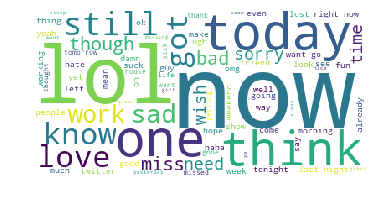

In [110]:
## Negative Comment Visualization

plt.imshow(wc.generate(neg_tweets))
plt.axis('off')
plt.show

I see words like need,miss,sorry,bad,wish

<function matplotlib.pyplot.show(*args, **kw)>

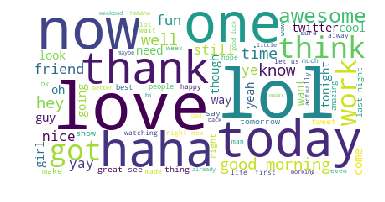

In [111]:
## Positive Comment Visualization

plt.imshow(wc.generate(pos_tweets))
plt.axis('off')
plt.show

I see words like fun,nice, yay,awesome, great

Today,now,work,lol seems to be present in both Positive and Negetive comments

We will see later how to deal with it in case our algorithm is not working well

In [113]:
##
#from sklearn.utils import shuffle

#df = shuffle(df)

In [147]:
#train_ratio = .85
#idx = int(len(df)*train_ratio)

#df_train = df[:idx]
#df_valid = df[idx:]


In [148]:
#print('Count of total Dataset      : ',len(df))

#print('Count of train Dataset      : ',len(df_train))

#print('Count of validation Dataset : ',len(df_valid))

In [149]:
import gc
gc.collect()


7

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [151]:
len(vectorizer.get_feature_names())

266797

In [152]:
vectorizer.get_feature_names()

## There are some really stupid words that are extracted as features

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaall',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaao',
 'aaaaaaaaaaaaaaaaaaaaaaaaaargh',
 'aaaaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaahrg',
 'aaaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaahhhhh',
 'aaaaaaaaaaaaaaaaaaaah',
 'aaaaaaaaaaaaaaaaaaaaint',
 'aaa

In [153]:
neg_doc = vectorizer.transform(df_train[df_train['label']==0]['text'])
pos_doc = vectorizer.transform(df_train[df_train['label']==4]['text'])

In [154]:
pos_doc.shape

(678166, 266797)

In [155]:
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)

In [156]:
pos_tf.shape

(1, 266797)

In [157]:
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [158]:
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive reviews
term_freq.columns =['Negative', 'Positive']
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']
term_freq.head()

,Negative,Positive,total
aa,131,77,208
aaa,78,48,126
aaaa,38,19,57
aaaaa,22,10,32
aaaaaa,15,10,25


In [160]:
term_freq.sort_values(by = 'total', ascending = False).head(20)

,Negative,Positive,total
to,292735,232202,524937
the,219454,226392,445846
is,172268,153440,325708
you,109884,197816,307700
not,205696,89449,295145
my,162151,107211,269362
it,133928,125913,259841
and,131014,127317,258331
in,98387,86324,184711
for,84135,99769,183904


In [163]:
term_freq.sort_values(by = 'total', ascending = False).tail(5)

,Negative,Positive,total
pandoraslocker,0,0,0
dnnvoice,0,0,0
spermatazoan,0,0,0
prescrption,0,0,0
indenting,0,0,0


In [164]:
term_freq.to_csv('term_freq.csv', encoding = 'utf-8')

In [173]:
## Start from where 

term_freq = None
term_freq = pd.read_csv('term_freq.csv')
term_freq.set_index('Unnamed: 0',inplace = True)
term_freq.head()

,Negative,Positive,total
Unnamed: 0,,,
aa,131,77,208
aaa,78,48,126
aaaa,38,19,57
aaaaa,22,10,32
aaaaaa,15,10,25


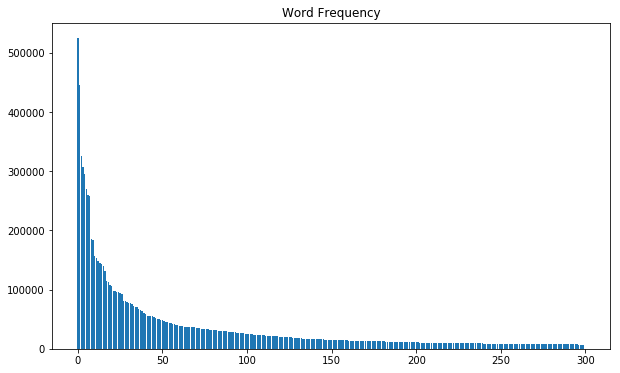

In [181]:
words_count = 300

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'total',ascending = False)['total'][:words_count])

plt.title('Word Frequency')
plt.show()

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = STOPWORDS,max_features = 5000)
vectorizer.fit(df['text'])


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'yourself', 'off', 'against', 'been', "haven't", 'like', "wouldn't", "he'd", 'because', 'shall', "she'll", "they've", 'k', 'and', "hasn't", 'had', "they'll", 'while', 'themselves', 'same', "you've", "i'll", 'www', 'with', 'by', 'she', 'theirs', 'can', "i've", 'for', 'there', "weren't", "...so', 'each', 'whom', 'otherwise', 'am', 'they', 'into', "we'd", "you'll", "isn't", 'about', "won't"},
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [186]:
neg_doc = vectorizer.transform(df_train[df_train['label']==0]['text'])
pos_doc = vectorizer.transform(df_train[df_train['label']==4]['text'])
neg_tf = np.sum(neg_doc, axis =0)
pos_tf = np.sum(pos_doc, axis =0)
# this is to remove the extra dimension
neg =np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

## Data frame for Term Frequency
term_freq = pd.DataFrame([neg,pos], columns = vectorizer.get_feature_names()).transpose()

## Now we have 2 columns negative positive.
## the term frequency for each of the word in both positive and negetive comments
term_freq.columns =['Negative', 'Positive']
## Add the columns total 
term_freq['total'] = term_freq['Negative']+ term_freq['Positive']


,Negative,Positive,total
aa,131,77,208
aaah,127,117,244
aah,124,131,255
aaron,148,150,298
abandoned,139,29,168
abc,140,114,254
ability,129,87,216
abit,130,106,236
able,3295,1353,4648
abs,82,97,179


In [188]:
## THis is still lot of bad words in the learned features. So we will correct them using some other ways

In [187]:
len(vectorizer.get_feature_names())

5000

In [190]:
term_freq.sort_values(by = 'Positive',ascending = False).head(10)

,Negative,Positive,total
good,24817,53008,77825
will,43230,49018,92248
day,35138,40802,75940
love,14504,40482,54986
going,41987,37336,79323
now,44878,35126,80004
lol,19641,30806,50447
thanks,4852,29137,33989
got,32959,27120,60079
time,23317,25915,49232


In [191]:
term_freq.sort_values(by = 'Negative',ascending = False).head(10)

,Negative,Positive,total
now,44878,35126,80004
will,43230,49018,92248
going,41987,37336,79323
go,38832,24219,63051
work,38666,16595,55261
want,35555,14589,50144
day,35138,40802,75940
got,32959,27120,60079
today,32539,25645,58184
back,28078,20242,48320


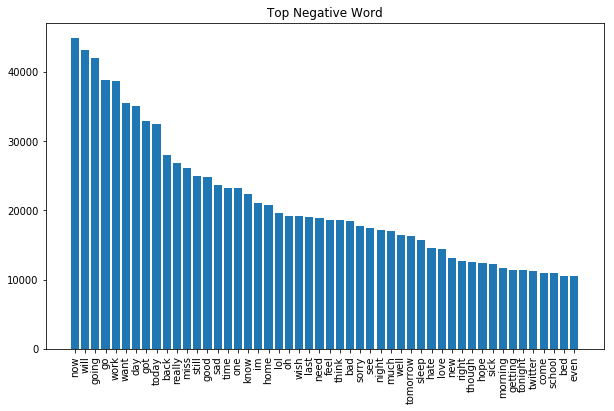

In [196]:
##Top 50 Negative words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Negative',ascending = False)['Negative'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Negative',ascending = False)['Negative']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Negative Word')
plt.show()

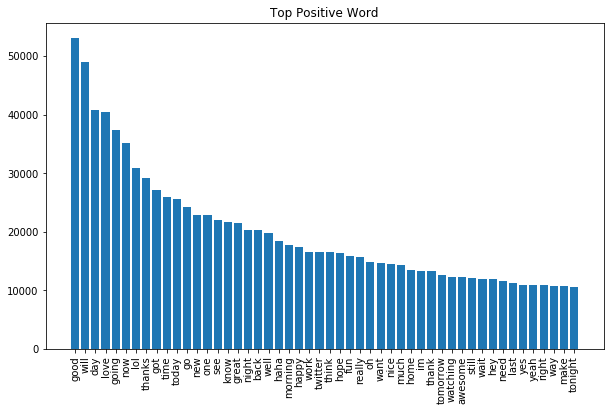

In [197]:
##Top 50 Positive words

words_count = 50

words = np.arange(words_count)
plt.figure(figsize = (10,6))
plt.bar(x=words,height =term_freq.sort_values(by = 'Positive',ascending = False)['Positive'][:words_count])
plt.xticks(ticks = words, labels = term_freq.sort_values(by = 'Positive',ascending = False)['Positive']
           [:words_count].index,rotation = 'vertical')
plt.title('Top Positive Word')
plt.show()

In [ ]:
## Some of the words are good features

## However some of the words are used in both positive and negative comments (like will,day)

In [199]:
##Lets look at positive to negetive ratio of the words

term_freq['pos/neg ratio'] = term_freq['Positive']/term_freq['Negative']

In [201]:
term_freq[(term_freq['pos/neg ratio'] > .9) &  (term_freq['pos/neg ratio'] < 1.1)]

,Negative,Positive,total,pos/neg ratio
aaah,127,117,244,0.921260
aah,124,131,255,1.056452
aaron,148,150,298,1.013514
absolute,117,118,235,1.008547
according,224,211,435,0.941964
account,1281,1182,2463,0.922717
act,325,357,682,1.098462
africa,158,152,310,0.962025
ahh,1372,1362,2734,0.992711
ahhh,1166,1069,2235,0.916810


In [202]:
## Awesome we are able to filter out some words which doesn't make much contribution to labelling a comment

##We will use it later

In [206]:
term_freq[(term_freq['pos/neg ratio'] < .6) |  (term_freq['pos/neg ratio'] > 1.5)].head(25)

,Negative,Positive,total,pos/neg ratio
aa,131,77,208,0.587786
abandoned,139,29,168,0.208633
able,3295,1353,4648,0.410622
absolutely,750,1185,1935,1.580000
ac,443,159,602,0.358916
accent,97,195,292,2.010309
access,588,208,796,0.353741
accident,641,112,753,0.174727
accidentally,323,79,402,0.244582
accomplished,74,196,270,2.648649


In [207]:
## Now we get some really interesting words that can be helpful

## We really have to do something about this 'aa', 'aah' words....This is just going to ruin my model

Text(0.5, 1.0, 'Frequency Distribution')

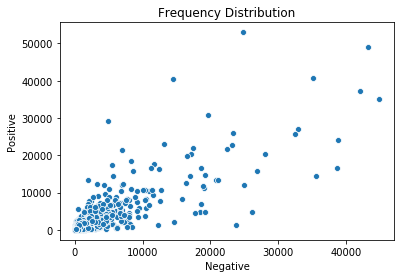

In [209]:
## scatterplot of positive and negative

sns.scatterplot(x = term_freq['Negative'] , y = term_freq['Positive'])
plt.title('Frequency Distribution')

In [211]:
## Positive Frequency percentage

positive_sum = term_freq['Positive'].sum()

term_freq['Positive Freq Pct'] = term_freq['Positive']*1.0/positive_sum

negative_sum = term_freq['Negative'].sum()

term_freq['Negative Freq Pct'] = term_freq['Negative']*1.0/negative_sum

In [213]:
term_freq.sort_values(by = 'Positive Freq Pct', ascending = False).head(20)

,Negative,Positive,total,pos/neg ratio,Positive Freq Pct,Negative Freq Pct
good,24817,53008,77825,2.135955,0.014060,0.006212
will,43230,49018,92248,1.133889,0.013002,0.010821
day,35138,40802,75940,1.161193,0.010823,0.008795
love,14504,40482,54986,2.791092,0.010738,0.003631
going,41987,37336,79323,0.889228,0.009903,0.010510
now,44878,35126,80004,0.782700,0.009317,0.011233
lol,19641,30806,50447,1.568454,0.008171,0.004916
thanks,4852,29137,33989,6.005153,0.007728,0.001215
got,32959,27120,60079,0.822840,0.007193,0.008250
time,23317,25915,49232,1.111421,0.006874,0.005837


In [216]:
## Good love thanks great is part of the top positive percentage

In [217]:
import gc
gc.collect()

19214

# START from here

In [218]:
##load clean tweets

##
df =pd.read_csv('clean_tweets_upd.csv')
df.head()

,text,label
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [232]:
## Update the labels for Positive tweets to 1. In the datset it is 4 for positive and 0 for negative
df['label'] = df['label'].apply(lambda x : 0 if x==0 else 1)

In [233]:
    ##remove repeated charecters like wow wowwwwwww, wowwwww
    ##try this -----------------
    ###   s = re.sub(r'(.)\1+', r'\1\1', s) add this at a later point 

In [234]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train,X_valid, y_train,y_valid = train_test_split(X,y,test_size= 0.01, shuffle = True, random_state = 1)

In [243]:
print('No of positive training example    : ', (y_train==1).sum())
print('No of negative training example    : ', (y_train==0).sum())
print('No of positive validation example  : ', (y_valid==1).sum())
print('No of negative validation example  : ', (y_valid==0).sum())

No of positive training example    :  789869
No of negative training example    :  790229
No of positive validation example  :  7989
No of negative validation example  :  7972


In [ ]:
## There are more number of negative examples here. So if a classifier predict negative label for all the tweets 

## The best train accuracy would be 50.01 on training set and 50.05 on validation set